In [1]:
#Importing necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Neural Network Library
import tensorflow as tf 
from tensorflow.keras import Sequential,regularizers 
from tensorflow.keras.layers import Dense, Dropout , BatchNormalization,LeakyReLU
from tensorflow.keras.losses import BinaryCrossentropy

from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from optuna import create_study, Trial
import xgboost as xgb

c:\Python 3.10.11\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset 
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [24]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [28]:
print(df['Diabetes_012'].value_counts())
print("0 : - No Diabetes , 1 - Pre-Diabetic,  2- Diabetic")

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
0 : - No Diabetes , 1 - Pre-Diabetic,  2- Diabetic


In [29]:
# Checking duplicates rows in dataset df to eliminate them
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()


Duplicate Rows :  23899


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [27]:
# eliminating 24206 duplicate rows from the dataset df
df.drop_duplicates(inplace = True)

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

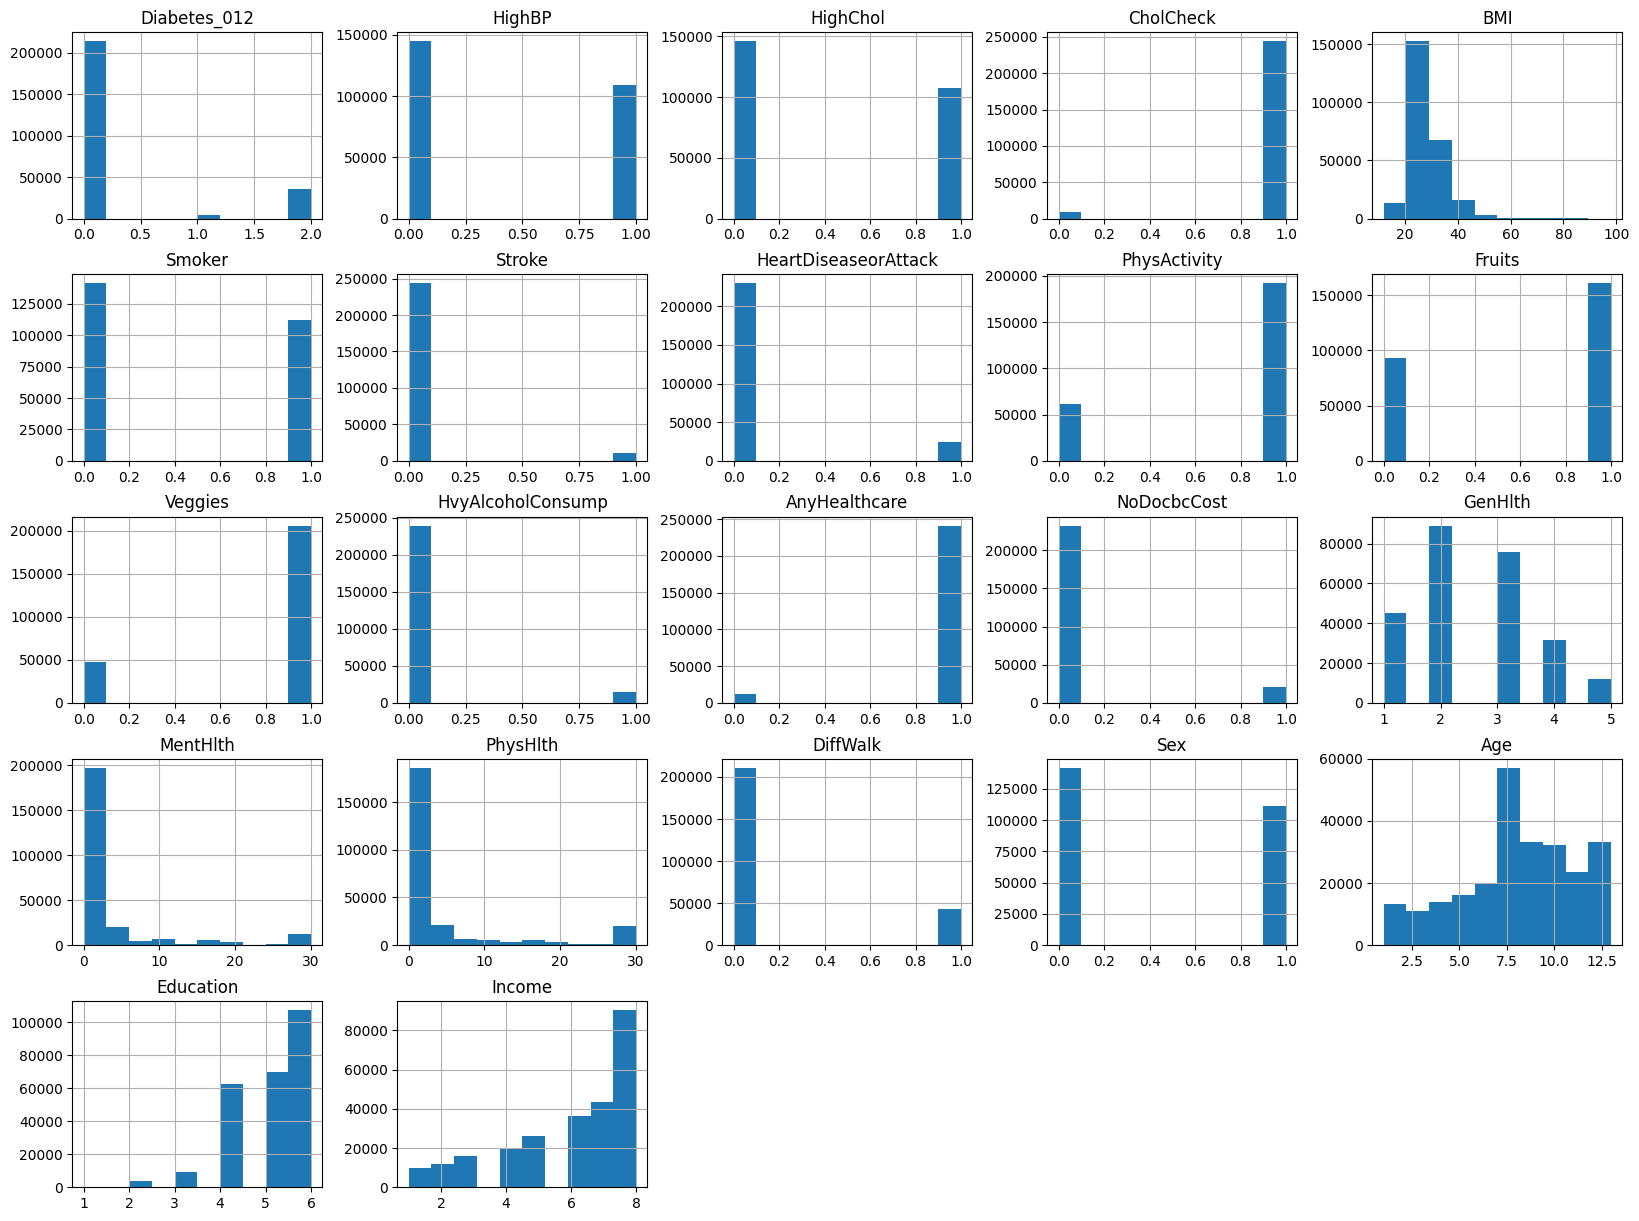

In [30]:
#using histogram to understand dataset df better
df.hist(figsize=(20,15))

Text(0.5, 1.0, 'correlation of feature')

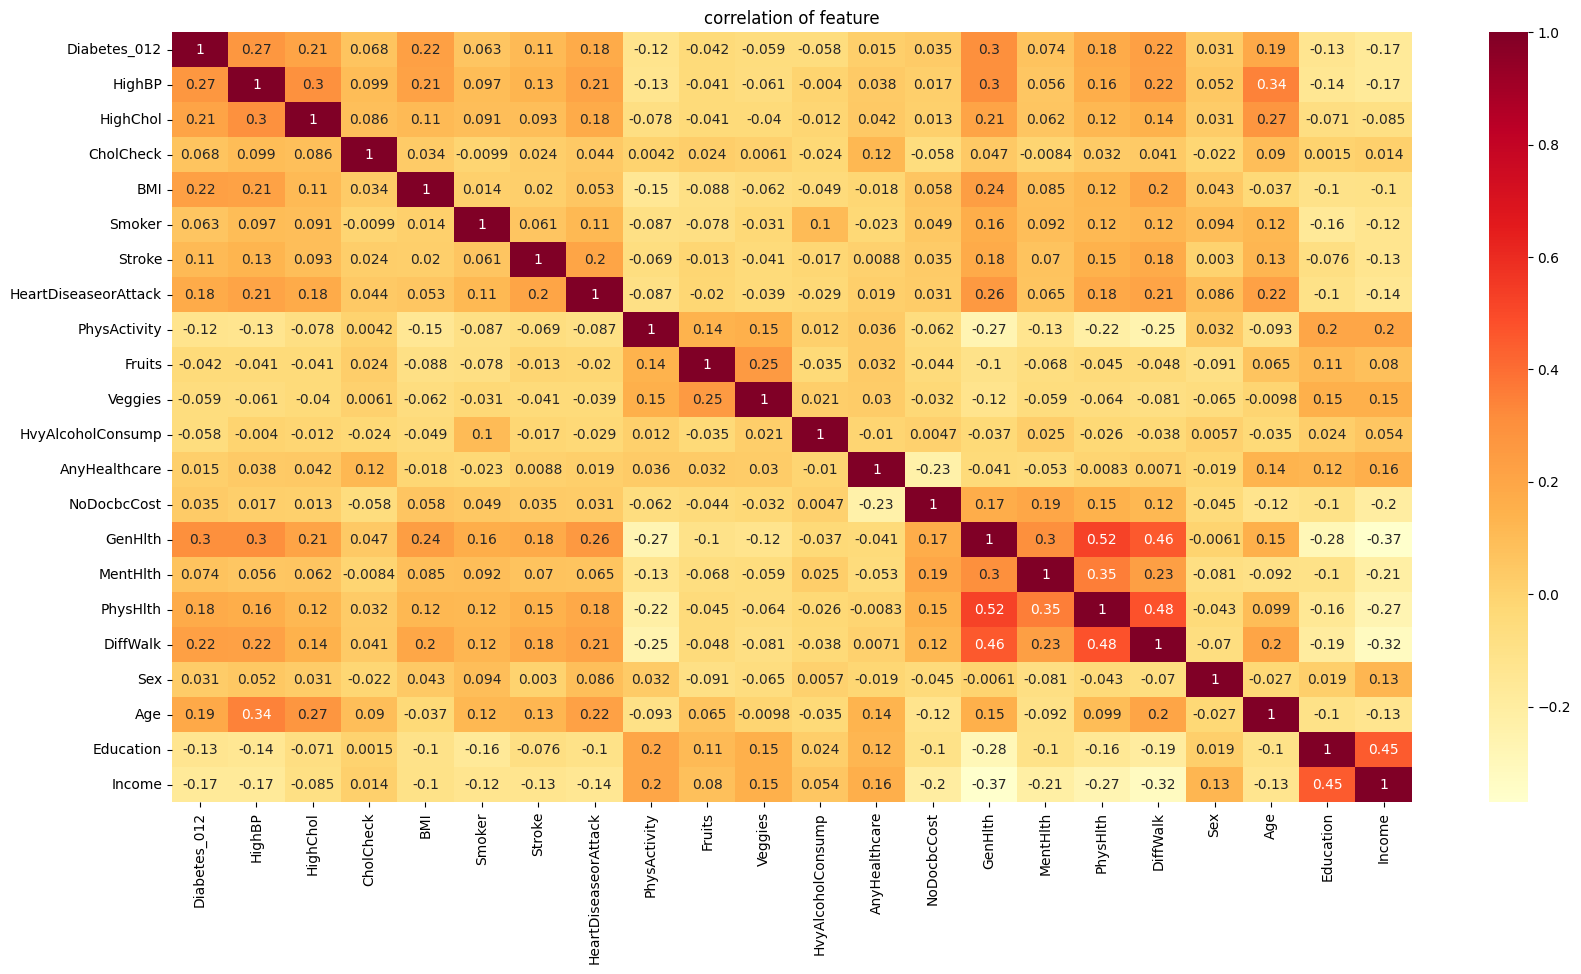

In [31]:
#using heatmap to understand correlation better in dataset df1 
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

<Axes: title={'center': 'Correlation with Diabetes_012'}>

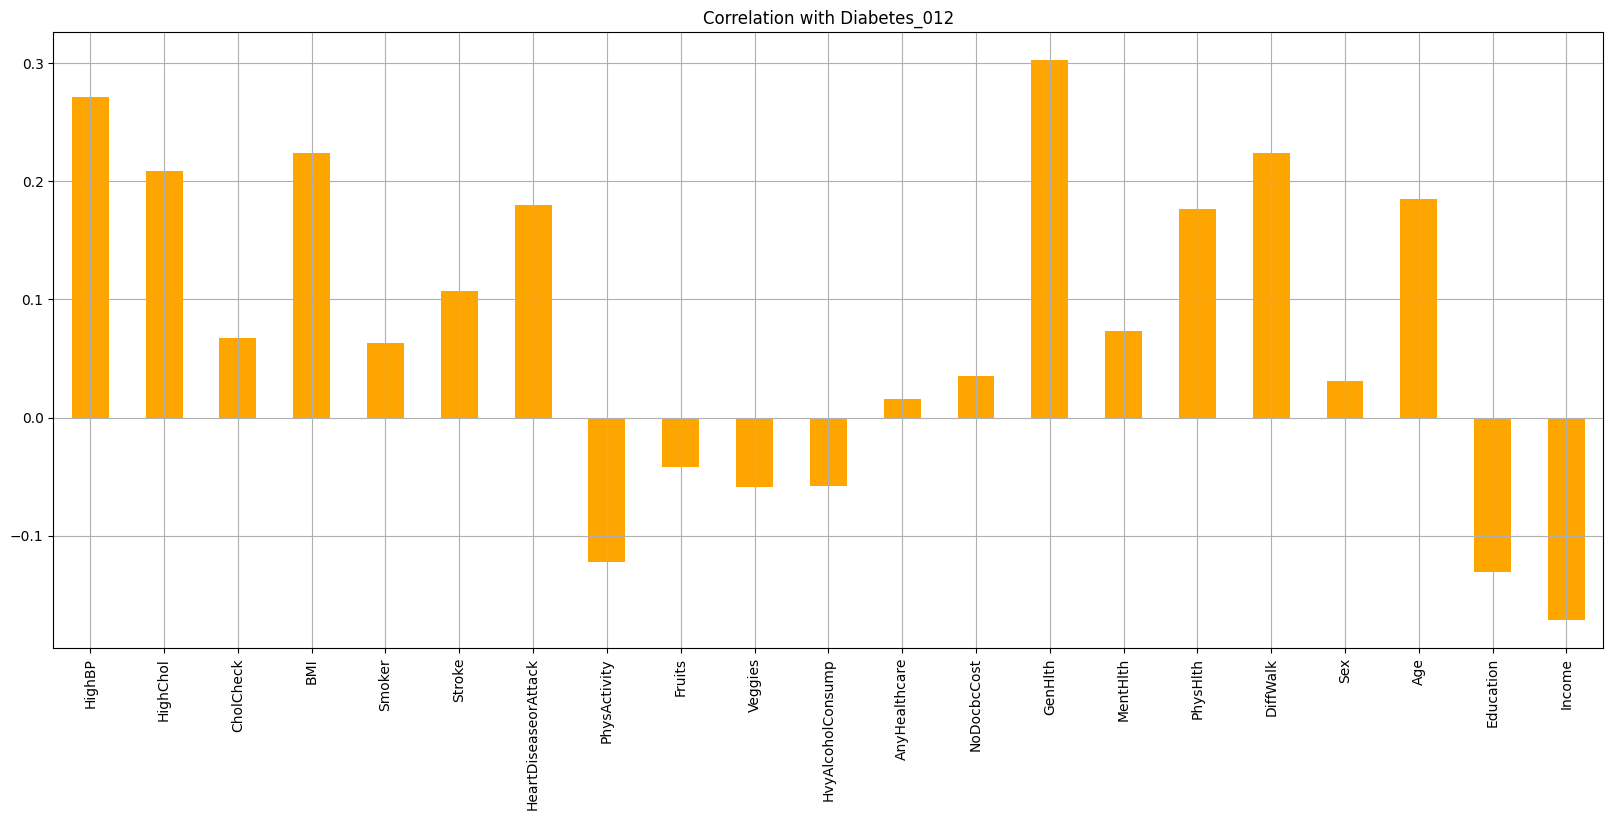

In [35]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012",color="Orange")

In [36]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  
df["Diabetes_binary_str"]= df["Diabetes_012"].replace({0:"Non-Diabetic",1:"Diabetic",2:"Diabetic"})
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary_str
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Non-Diabetic
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,Non-Diabetic
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,Non-Diabetic
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,Non-Diabetic
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,Non-Diabetic


In [37]:
df["Diabetes_binary_str"].value_counts()

Diabetes_binary_str
Non-Diabetic    213703
Diabetic         39977
Name: count, dtype: int64

In [3]:
X = df[['HighBP', 'HighChol', 'BMI','HeartDiseaseorAttack', 'Stroke', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']]
y = df['Diabetes_012']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Making the neural network model for our heart attack risk prediction (Model-3)

# Model architecture
model2 = Sequential([
    Dense(units=256, activation='relu',kernel_regularizer=regularizers.l2(0.01),input_dim=12),
    BatchNormalization(),
    # Dropout(rate=0.3),
    Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    # Dropout(rate=0.3),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    # Dropout(rate=0.3),
    Dense(units=1, activation='sigmoid')
])

# Model compilation
model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

# Model training
model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

train_loss, train_acc = model2.evaluate(X_train, y_train, verbose=0)
print('\nTrain accuracy:', train_acc*100)

# Make predictions
y_pred = model2.predict(X_train)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Convert predicted probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary, average='macro')

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Epoch 1/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6944 - loss: 1.1021 - val_accuracy: 0.7847 - val_loss: 0.4605
Epoch 2/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7175 - loss: 0.4281 - val_accuracy: 0.7868 - val_loss: 0.4006
Epoch 3/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7094 - loss: 0.4089 - val_accuracy: 0.7647 - val_loss: 0.4280
Epoch 4/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7109 - loss: 0.3917 - val_accuracy: 0.7121 - val_loss: -0.0832
Epoch 5/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6972 - loss: 0.2807 - val_accuracy: 0.7815 - val_loss: 0.1538
Epoch 6/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6877 - loss: -0.0242 - val_accuracy: 0.6852 - val_loss: -1.2436
Epoch 7/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6760 - loss: -0.5020 - val_accuracy: 0.5256 - val_loss: -1.1506
Epoch 8/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6615 - loss: -1.

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [16]:
# Make predictions
y_pred1 = model2.predict(X_test)
y_pred_binary1 = np.where(y_pred1 > 0.5, 1, 0)  # Convert predicted probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary1)
precision = precision_score(y_test, y_pred_binary1)
recall = recall_score(y_test, y_pred_binary1)
f1 = f1_score(y_test, y_pred_binary1, average='macro')

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.7467289058632153
Precision: 0.7443630214205186
Recall: 0.7493261455525606
F1 score: 0.7467288602541873


In [17]:
# Define the XGBoost model

model = xgb.XGBClassifier()
# Hyperparameter Tuning using Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5)
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_xg = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_xg)
    return accuracy

study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

# Train the model with the best hyperparameters
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy:', accuracy)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation score
mean_score = np.mean(scores)
print('Mean cross-validation score:', mean_score)

# Make predictions
y_pred_binary_xgb = np.where(y_pred > 0.5, 1, 0)  

# Calculate metrics
accuracy_class = accuracy_score(y_train, y_pred_binary_xgb)
precision = precision_score(y_train, y_pred_binary_xgb)
recall = recall_score(y_train, y_pred_binary_xgb)
f1 = f1_score(y_train, y_pred_binary_xgb, average='macro')

# Print the evaluation results
print('Accuracy:', accuracy_class)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


[I 2024-03-28 07:37:58,432] A new study created in memory with name: no-name-fcbbf838-1203-4b7a-80c8-dde0f86ddd2e
[I 2024-03-28 07:37:59,104] Trial 0 finished with value: 0.807030573090729 and parameters: {'max_depth': 6, 'n_estimators': 183, 'learning_rate': 0.43246767274195574}. Best is trial 0 with value: 0.807030573090729.
[I 2024-03-28 07:38:00,360] Trial 1 finished with value: 0.8481954980283981 and parameters: {'max_depth': 8, 'n_estimators': 429, 'learning_rate': 0.12978007554298568}. Best is trial 1 with value: 0.8481954980283981.
[I 2024-03-28 07:38:01,492] Trial 2 finished with value: 0.8008947359114459 and parameters: {'max_depth': 7, 'n_estimators': 475, 'learning_rate': 0.0801526666449537}. Best is trial 1 with value: 0.8481954980283981.
[I 2024-03-28 07:38:01,998] Trial 3 finished with value: 0.7720722154439199 and parameters: {'max_depth': 4, 'n_estimators': 343, 'learning_rate': 0.3695629458664516}. Best is trial 1 with value: 0.8481954980283981.
[I 2024-03-28 07:38:02

Accuracy: 0.9650239598252967
Cross-validation scores: [0.70205994 0.69993811 0.69074352 0.70194518 0.70176835]
Mean cross-validation score: 0.6992910213690717
Accuracy: 0.9650239598252967
Precision: 0.9694958792679012
Recall: 0.9603138141852493
F1 score: 0.9650233962939816


In [22]:
# Evaluate the model
y_pred1_xgb = model.predict(X_test)

# Make predictions
y_pred_binary1_xgb = np.where(y_pred1_xgb > 0.5, 1, 0)  # Convert predicted probabilities to binary labels

# Calculate metrics
accuracy_class = accuracy_score(y_test, y_pred_binary1_xgb)
precision = precision_score(y_test, y_pred_binary1_xgb)
recall = recall_score(y_test, y_pred_binary1_xgb)
f1 = f1_score(y_test, y_pred_binary1_xgb, average='macro')

# Print the evaluation results
print('Accuracy:', accuracy_class)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7008274984086569
Precision: 0.6925283431225242
Recall: 0.7192509575826358
F1 score: 0.7007476209604061
